<a href="https://www.kaggle.com/rinichristy/naive-bayes-classification-of-social-network-ad?scriptVersionId=90193332" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Naive Bayes Classification of Social Network Ad**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing the dataset**

In [2]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## **Data Visualization**

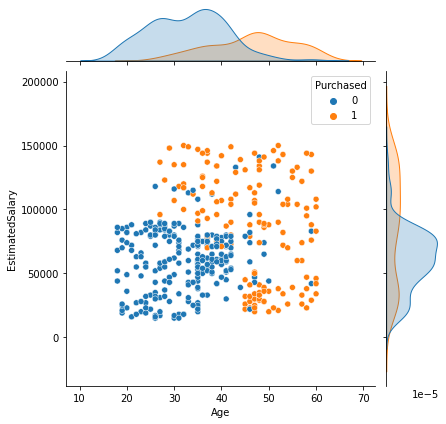

In [3]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df, hue = 'Purchased', kind= 'scatter');

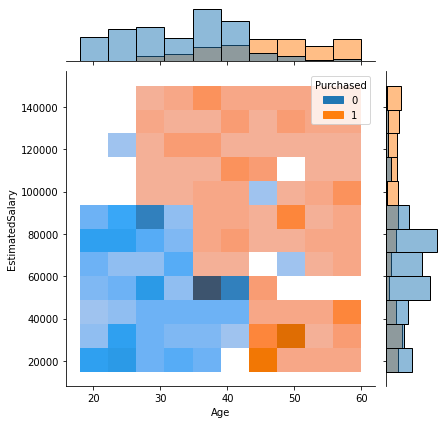

In [4]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df, hue = 'Purchased', kind= 'hist');

In [5]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

## **Splitting the dataset into the Train set and Test set**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Training of Naive Bayes Models**

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## **Predicting the Test set results**

In [9]:
y_pred = classifier.predict(X_test)

## **Making the Confusion Matrix**

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


## **Generating the Confusion Matrix and Classification report**

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Naive Bayes Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of Naive Bayes Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Naive Bayes Model:' '\n',classification_report(y_test, y_pred))

Accuracy of Naive Bayes Model is  0.9

 
 Confusion Matrix of Naive Bayes Model:
 [[65  3]
 [ 7 25]]

 
 Classification Report for Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



## **Visualizing the Train set results**

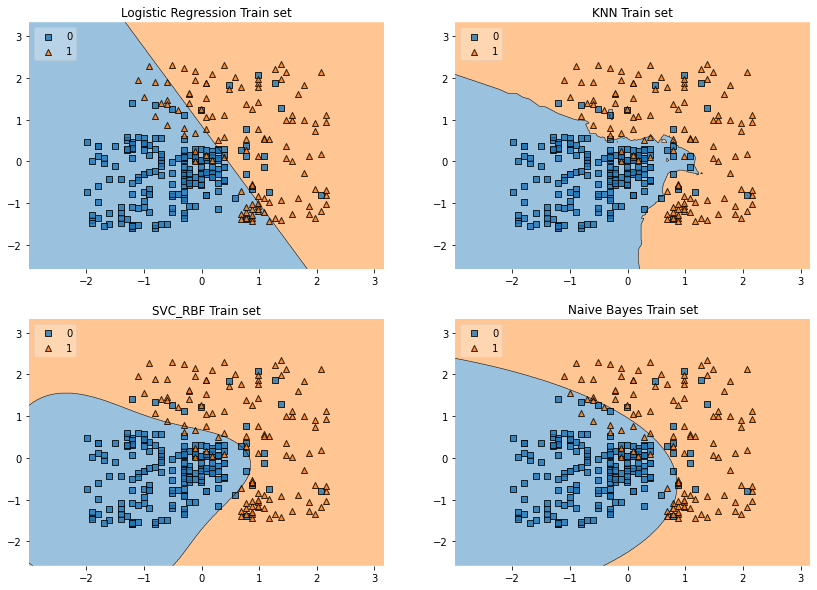

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression Train set', 'KNN Train set', 'SVC_RBF Train set','Naive Bayes Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

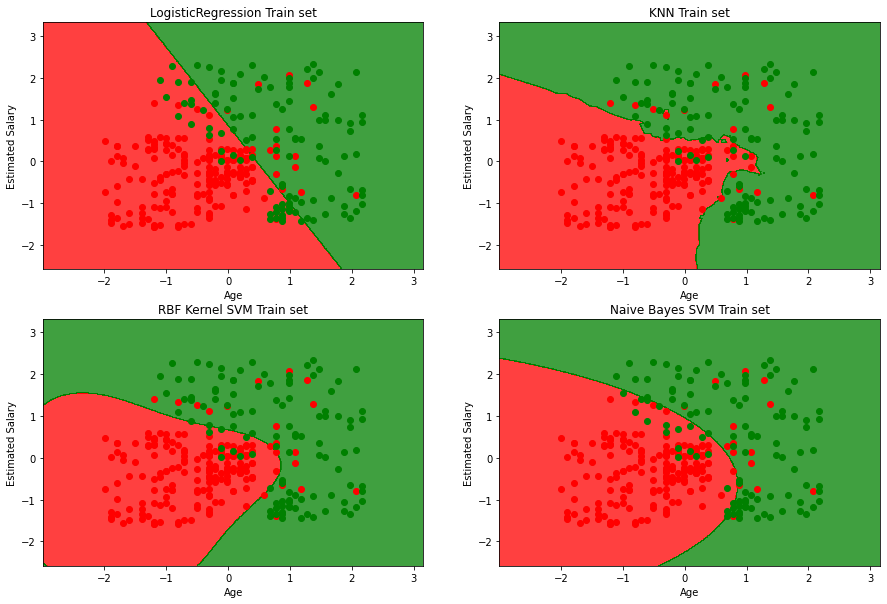

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4)) = plt.subplots(2, 2, figsize=(15,10))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes1.set_title('LogisticRegression Train set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes2.set_title('KNN Train set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes3.set_title('RBF Kernel SVM Train set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes4.set_title('Naive Bayes SVM Train set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')
plt.show()

## **Visualizing the Test set results**

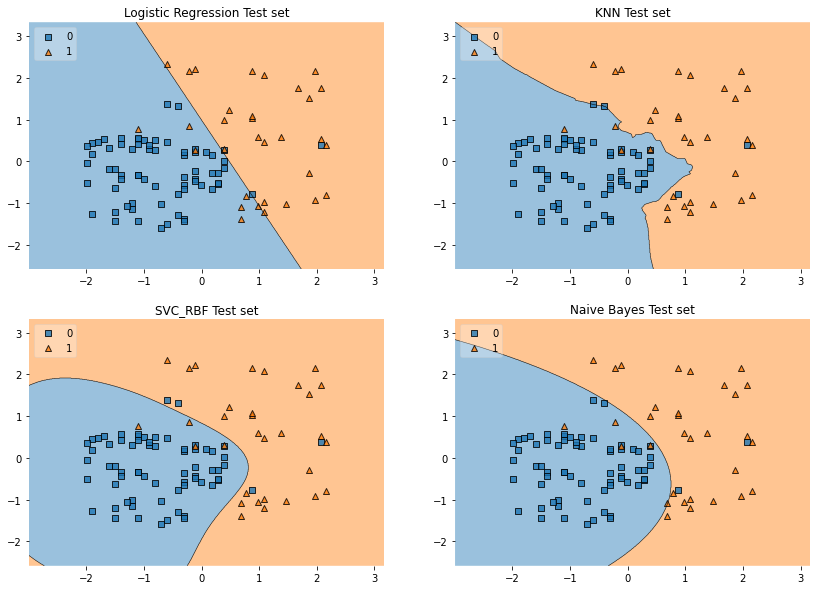

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression Test set', 'KNN Test set', 'SVC_RBF Test set','Naive Bayes Test set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1)]): 
 
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

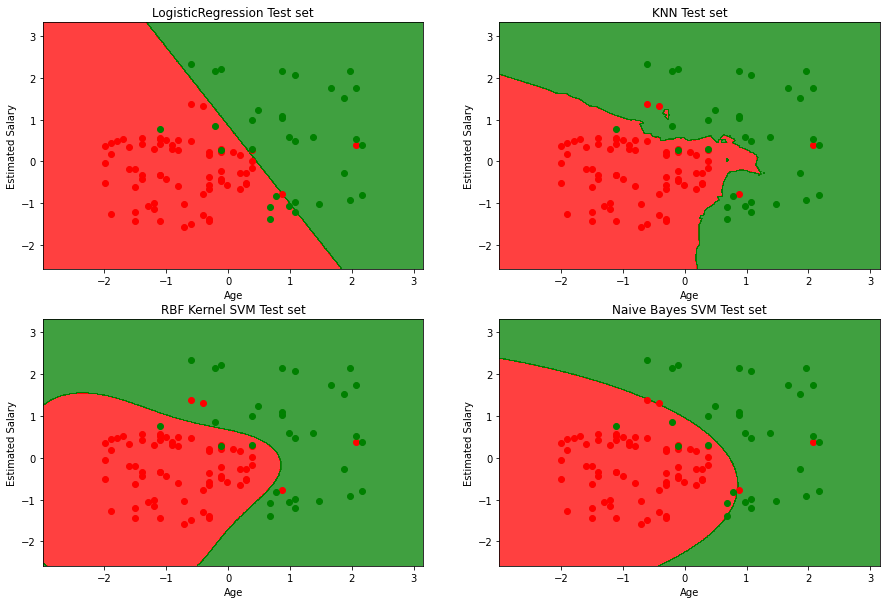

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4)) = plt.subplots(2, 2, figsize=(15,10))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes1.set_title('LogisticRegression Test set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes2.set_title('KNN Test set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes3.set_title('RBF Kernel SVM Test set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes4.set_title('Naive Bayes SVM Test set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')
plt.show()